<h2>Untited Kingdom Road Accident Data Analysis</h2>
<h3>Inclusive years: 2019 -2022</h3>
<h4>Aira Mikyl C. Rasca</h4>

<h1>Importing libraries</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings

In [2]:
accident = pd.read_csv('dataset\\accident_data.csv')

In [3]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [4]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [5]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')

In [6]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h1>Converting Object to DateTime Data type</h1>

In [7]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'] , dayfirst = True, errors = 'coerce')

In [8]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [9]:
accident['District Area']

0         Kensington and Chelsea
1         Kensington and Chelsea
2         Kensington and Chelsea
3         Kensington and Chelsea
4         Kensington and Chelsea
                   ...          
660674                  Highland
660675                  Highland
660676                  Highland
660677                  Highland
660678                  Highland
Name: District Area, Length: 660679, dtype: object

In [10]:
accident[(accident['District Area'] == 'Kensington and Chelsea') & (accident['Accident_Severity'] == 'Serious')].info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 0 to 533337
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Index                    370 non-null    object        
 1   Accident_Severity        370 non-null    category      
 2   Accident Date            370 non-null    datetime64[ns]
 3   Latitude                 370 non-null    float64       
 4   Light_Conditions         370 non-null    object        
 5   District Area            370 non-null    object        
 6   Longitude                370 non-null    float64       
 7   Number_of_Casualties     370 non-null    int64         
 8   Number_of_Vehicles       370 non-null    int64         
 9   Road_Surface_Conditions  370 non-null    object        
 10  Road_Type                368 non-null    object        
 11  Urban_or_Rural_Area      370 non-null    object        
 12  Weather_Conditions       369 non-null 

In [11]:
accident["Month"] = accident["Accident Date"].dt.month

<h1>1.</h1>

In [12]:
accident['Accident_Severity'].value_counts()


Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h2>Insight 1 - The most accidents are slight severity but still a significant number of serious accidents need to be addressed. </h2>

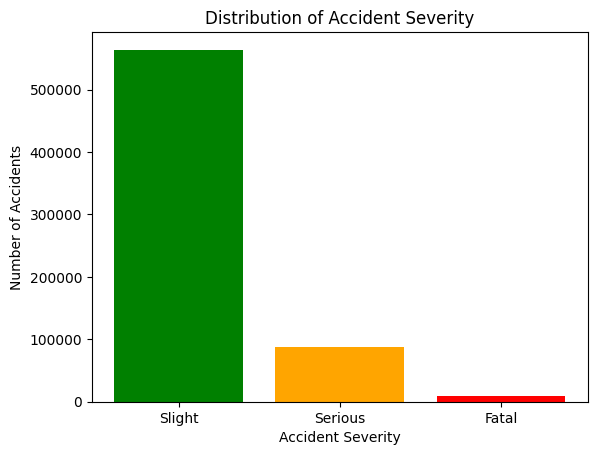

In [13]:
# Data for accident severity
categories = ["Slight", "Serious", "Fatal"]
counts = [563801, 88217, 8661]

plt.bar(categories, counts, color=["green", "orange", "red"])

# Add labels and title
plt.xlabel("Accident Severity")
plt.ylabel("Number of Accidents")
plt.title("Distribution of Accident Severity")
plt.show()


<h2>2.</h2>

In [14]:
accidents_by_weather = accident['Weather_Conditions'].value_counts()
accidents_by_weather

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h2>Insight 2 - The weather that most accident often happen is Fine no high winds,</h2>

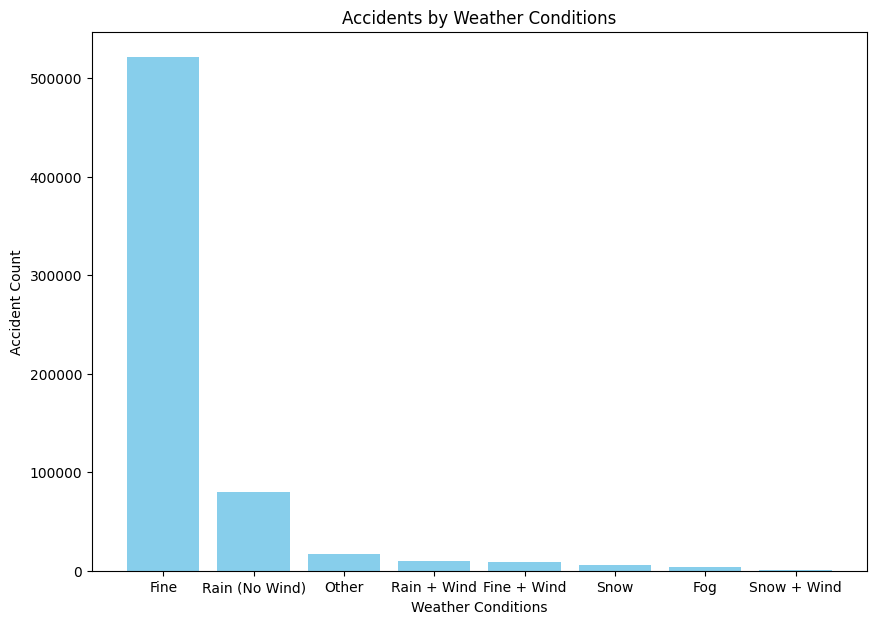

In [15]:
weather = ["Fine", "Rain (No Wind)", "Other", "Rain + Wind", "Fine + Wind", "Snow", "Fog", "Snow + Wind"]
counts = [520885, 79696, 17150, 9615, 8554, 6238, 3528, 885]
fig, ax = plt.subplots(figsize=(10, 7))
plt.bar(weather, counts, color="skyblue")
plt.xlabel("Weather Conditions")
plt.ylabel("Accident Count")
plt.title("Accidents by Weather Conditions")
plt.show()

<h1>3.</h1>

In [16]:
accidents_per_year = accident.groupby(accident['Accident Date'].dt.year).size()

In [17]:
accidents_per_year

Accident Date
2019    182115
2020    170591
2021    163554
2022    144419
dtype: int64

<h2>Insight 3 - Accidents dropped from 182,115 in 2019 to 144,419 in 2022, showing some improvement.</h2>

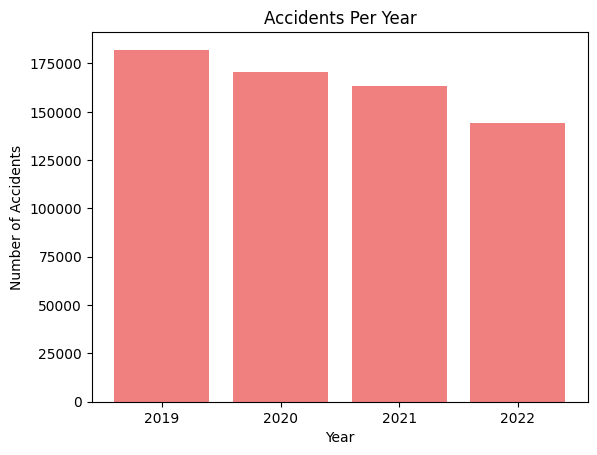

In [18]:
years = [2019, 2020, 2021, 2022]
accidents = [182115, 170591, 163554, 144419]

plt.bar(years, accidents, color="lightcoral")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Accidents Per Year")
plt.xticks(years)

plt.show()

<h1>4.</h1>

In [19]:
accident['Day of the Week'] = accident['Accident Date'].dt.day_name()
accidents_by_day = accident['Day of the Week'].value_counts()

In [20]:
accidents_by_day

Day of the Week
Saturday     107178
Wednesday     99558
Thursday      99511
Friday        97900
Tuesday       94550
Sunday        89302
Monday        72680
Name: count, dtype: int64

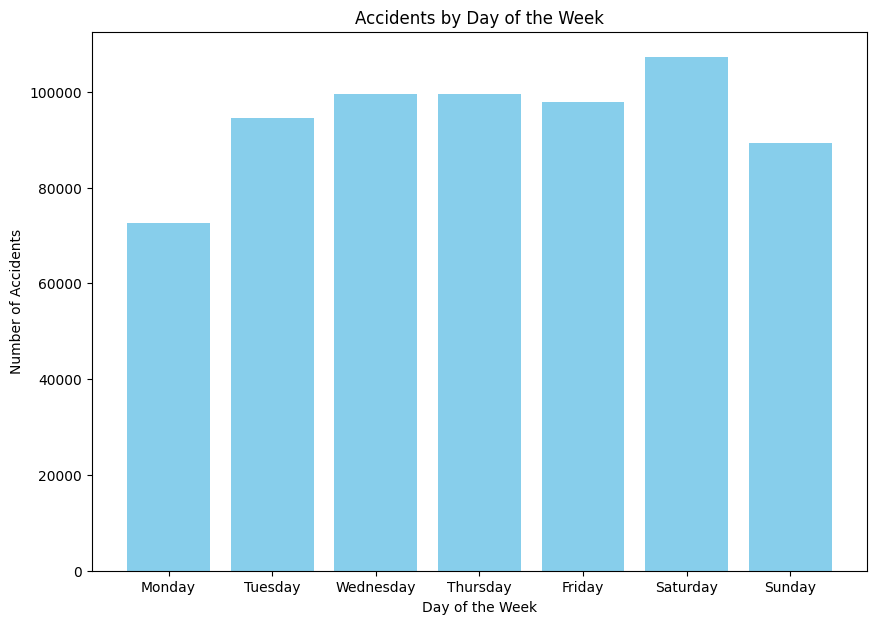

In [21]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
accidents = [72680, 94550, 99558, 99511, 97900, 107178, 89302]

fig, ax = plt.subplots(figsize=(10, 7))

plt.bar(days, accidents, color="skyblue")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Day of the Week")

plt.show()

<h2>Insight 4 -Accidents are more common on Saturdays maybe because more people are driving.</h2>

<h1>5. district areas have the highest accident frequency for different levels of accident severity</h1>

In [22]:
accidents_by_area_severity = accident.groupby(['District Area', 'Accident_Severity']).size().reset_index(name='Accident_Count')
accidents_by_area_severity

C:\Users\User\AppData\Local\Temp\ipykernel_7912\82395745.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidents_by_area_severity = accident.groupby(['District Area', 'Accident_Severity']).size().reset_index(name='Accident_Count')


,District Area,Accident_Severity,Accident_Count
0,Aberdeen City,Fatal,12
1,Aberdeen City,Serious,239
2,Aberdeen City,Slight,1072
3,Aberdeenshire,Fatal,66
4,Aberdeenshire,Serious,463
...,...,...,...
1261,Wyre Forest,Serious,132
1262,Wyre Forest,Slight,815
1263,York,Fatal,21
1264,York,Serious,255


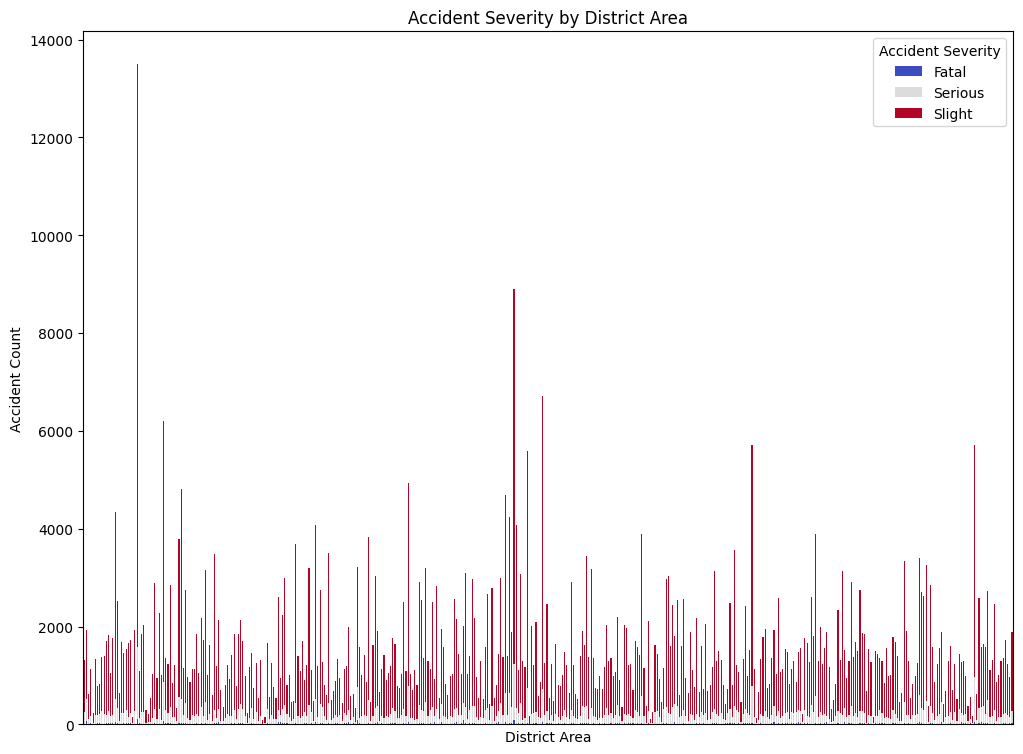

In [23]:
df = accidents_by_area_severity.pivot(index="District Area", columns="Accident_Severity", values="Accident_Count").fillna(0)


df.plot(kind="bar", stacked=True, figsize=(12,9), colormap="coolwarm")
plt.xlabel("District Area")
plt.ylabel("Accident Count")
plt.title("Accident Severity by District Area")
plt.legend(title="Accident Severity")
plt.xticks([])  # Hide x-ticks to keep it clean (remove if needed)

plt.show()

<h2>Insight 5 - Urban areas like Aberdeen City and York have the most accidents, mostly slight or serious, while rural areas like Aberdeenshire see more fatal cases. This suggests that traffic volume and road conditions impact accident severity, highlighting the need for better safety measures in high-risk areas.</h2>

<h1> 6. Vehicles involved per accident severity</h1>

In [24]:
severity_vec_counts = accident.groupby("Accident_Severity")["Number_of_Vehicles"].mean()
severity_vec_counts

C:\Users\User\AppData\Local\Temp\ipykernel_7912\97643734.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_vec_counts = accident.groupby("Accident_Severity")["Number_of_Vehicles"].mean()


Accident_Severity
Fatal      1.786976
Serious    1.678327
Slight     1.855864
Name: Number_of_Vehicles, dtype: float64

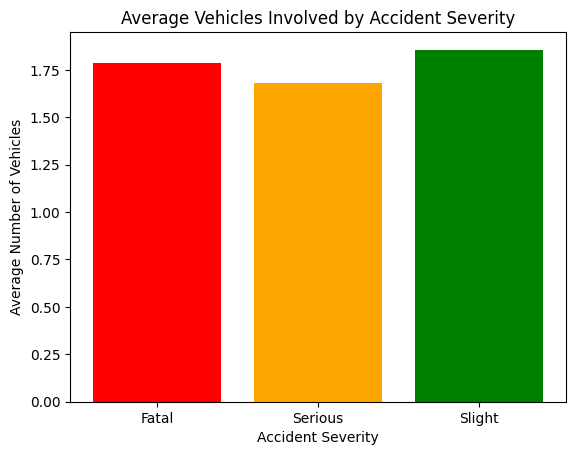

In [25]:
severity = ["Fatal", "Serious", "Slight"]
avg_vehicles = [1.786976, 1.678327, 1.855864]


plt.bar(severity, avg_vehicles, color=["red", "orange", "green"])
plt.xlabel("Accident Severity")
plt.ylabel("Average Number of Vehicles")
plt.title("Average Vehicles Involved by Accident Severity")


plt.show()

<h2>Insight 6 - Severe accidents typically involve a higher number of vehicles than slight accidents.</h2>

<h1>7.  Detailed count of accidents per district and severity</h1>

In [26]:
urban_rural_accidents = accidents_by_area_severity.groupby(['District Area', 'Accident_Severity'])['Accident_Count'].sum().unstack().fillna(0)
urban_rural_accidents

C:\Users\User\AppData\Local\Temp\ipykernel_7912\3422176608.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  urban_rural_accidents = accidents_by_area_severity.groupby(['District Area', 'Accident_Severity'])['Accident_Count'].sum().unstack().fillna(0)


Accident_Severity,Fatal,Serious,Slight
District Area,,,
Aberdeen City,12,239,1072
Aberdeenshire,66,463,1401
Adur,8,101,510
Allerdale,24,143,961
Alnwick,6,33,193
...,...,...,...
Wychavon,30,193,1138
Wycombe,20,216,1493
Wyre,15,186,1037


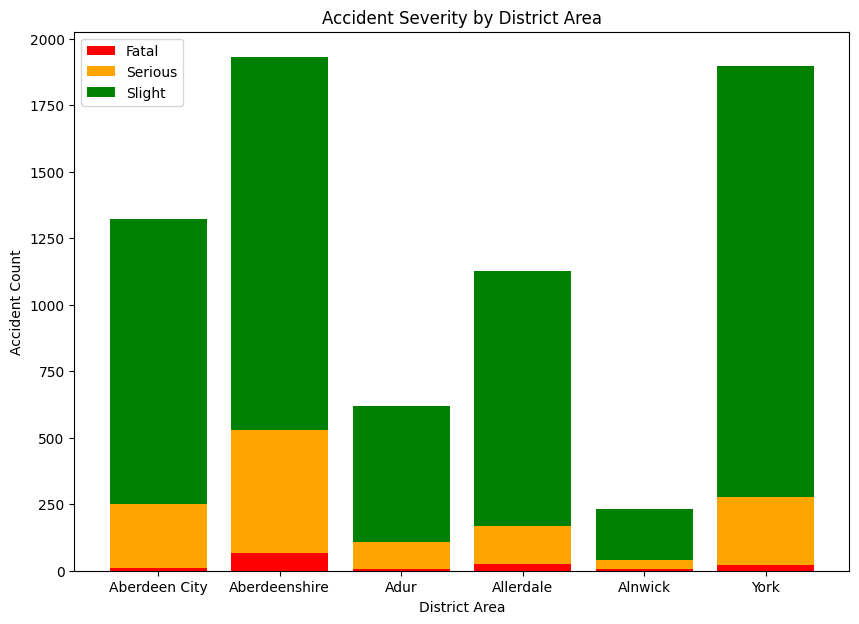

In [27]:
districts = ["Aberdeen City", "Aberdeenshire", "Adur", "Allerdale", "Alnwick", "York"]
fatal = [12, 66, 8, 24, 6, 21]
serious = [239, 463, 101, 143, 33, 255]
slight = [1072, 1401, 510, 961, 193, 1621]


fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(districts, fatal, label="Fatal", color="red")
ax.bar(districts, serious, bottom=fatal, label="Serious", color="orange")
ax.bar(districts, slight, bottom=[i + j for i, j in zip(fatal, serious)], label="Slight", color="green")

plt.xlabel("District Area")
plt.ylabel("Accident Count")
plt.title("Accident Severity by District Area")
plt.legend()

plt.show()

<h2>Insight 7 - slight accidents are the most frequent, followed by serious and fatal ones. Some districts, like Aberdeenshire and York, have notably high accident counts across all severity levels.</h2>

<h1>8. Type of vehicle are involved in accidents</h1>

In [28]:
vehicle_counts = accident['Vehicle_Type'].value_counts().nlargest(5)
vehicle_counts

Vehicle_Type
Car                                     497992
Van / Goods 3.5 tonnes mgw or under      34160
Bus or coach (17 or more pass seats)     25878
Motorcycle over 500cc                    25657
Goods 7.5 tonnes mgw and over            17307
Name: count, dtype: int64

<h2>Insight 8 -Cars are involved in accidents the most, significantly more than other vehicle types. Vans, buses, motorcycles, and heavy goods vehicles also contribute but at much lower numbers.</h2>

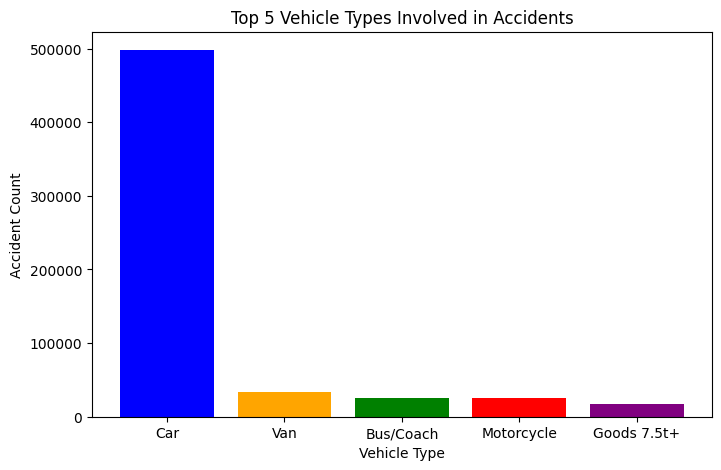

In [29]:
vehicle_types = ["Car", "Van", "Bus/Coach", "Motorcycle", "Goods 7.5t+"]
counts = [497992, 34160, 25878, 25657, 17307]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(vehicle_types, counts, color=["blue", "orange", "green", "red", "purple"])

# Labels
plt.xlabel("Vehicle Type")
plt.ylabel("Accident Count")
plt.title("Top 5 Vehicle Types Involved in Accidents")

# Show chart
plt.show()

<h1> 9. What is the distribution of accidents in urban vs. rural areas? </h1>

In [30]:
accidents_by_area_type = accident.groupby(['Urban_or_Rural_Area']).size().reset_index(name='Accident_Count')
accidents_by_area_type

,Urban_or_Rural_Area,Accident_Count
0,Rural,238990
1,Unallocated,11
2,Urban,421663


<h2>Insight 9 -Accidents are more common in urban areas than in rural areas, with urban accidents nearly doubling rural ones. Unallocated cases are minimal.</h2>

Text(0.5, 1.0, 'Accidents by Area Type')

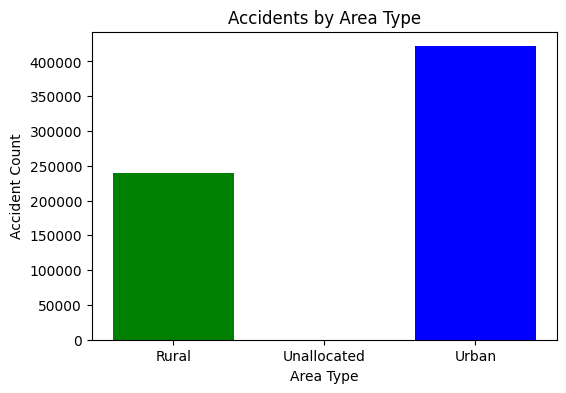

In [31]:
area_types = ["Rural", "Unallocated", "Urban"]
counts = [238990, 11, 421663]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(area_types, counts, color=["green", "gray", "blue"])

# Labels
plt.xlabel("Area Type")
plt.ylabel("Accident Count")
plt.title("Accidents by Area Type")

# Show chart

<h1>10 most common road surface conditions during accidents?</h1>

In [32]:
accidents_by_road_surface = accident.groupby(['Road_Surface_Conditions']).size().reset_index(name='Accident_Count')
accidents_by_road_surface

,Road_Surface_Conditions,Accident_Count
0,Dry,447821
1,Flood over 3cm. deep,1017
2,Frost or ice,18517
3,Snow,5890
4,Wet or damp,186708


<h2> Insight 10 -The most common road surface condition during accidents is "Dry," followed by "Wet or damp." Hazardous conditions like "Frost or ice" and "Snow" contribute to significantly fewer accidents, while "Flood over 3cm deep" has the lowest count.</h2>

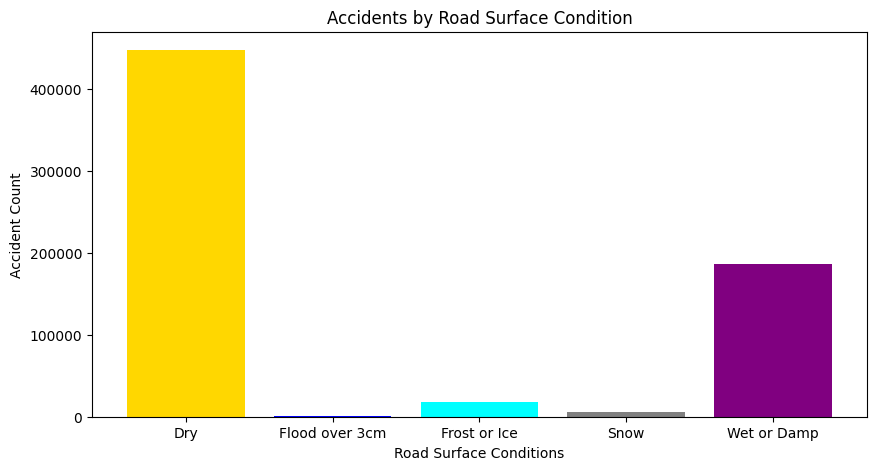

In [33]:
road_conditions = ["Dry", "Flood over 3cm", "Frost or Ice", "Snow", "Wet or Damp"]
accident_counts = [447821, 1017, 18517, 5890, 186708]

plt.figure(figsize=(10, 5))
plt.bar(road_conditions, accident_counts, color=["gold", "blue", "cyan", "gray", "purple"])
plt.xlabel("Road Surface Conditions")
plt.ylabel("Accident Count")
plt.title("Accidents by Road Surface Condition")

plt.xticks(rotation=0)

# Show chart
plt.show()

<h1>11. months or seasons have the highest accident rates</h1>

In [34]:
accidents_by_month = accident.groupby(accident['Accident Date'].dt.month).size().reset_index(name='Accident_Count')
accidents_by_month

,Accident Date,Accident_Count
0,1,52872
1,2,49491
2,3,54086
3,4,51744
4,5,56352
5,6,56481
6,7,57445
7,8,53913
8,9,56455
9,10,59580


<h2>Accidents remain relatively steady throughout the year, but they peak in month 10 and 11, likely influenced by seasonal shifts and weather conditions.</h2>

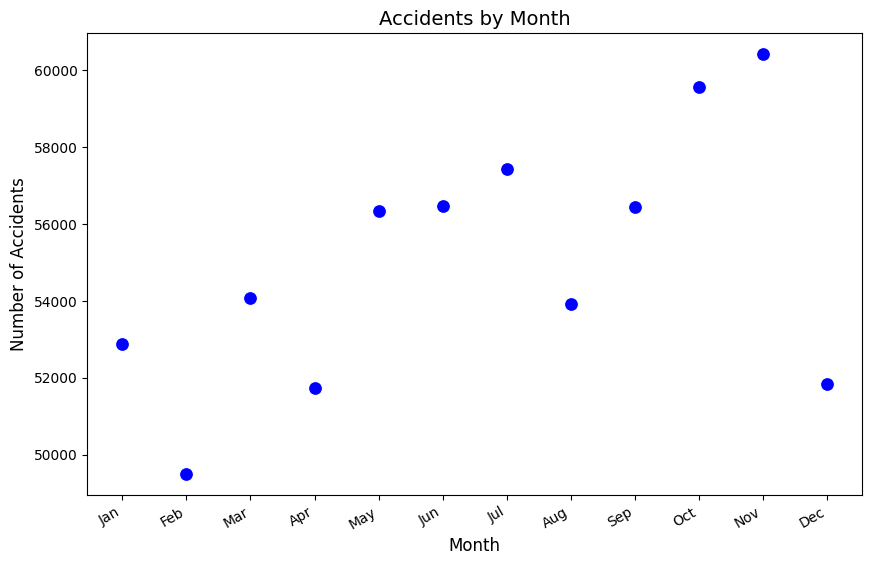

In [35]:
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
accidents_by_month['Month'] = accidents_by_month['Accident Date'].apply(lambda x: month_names[x - 1])

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=accidents_by_month, 
    x='Month', 
    y='Accident_Count', 
    color='blue', 
    s=100
)

plt.title("Accidents by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks(rotation=30, ha="right")

plt.show()

<h1>12. distribution of accident severity</h1>

In [36]:
severity_counts = accident['Accident_Severity'].value_counts(normalize=True) * 100
display(severity_counts.to_frame())

,proportion
Accident_Severity,
Slight,85.336601
Serious,13.352475
Fatal,1.310924


<h2>Insight 12 - The majority of accidents are slight (85.3%), while serious and fatal accidents are significantly lower at 13.3% and 1.3%, respectively.</h2>

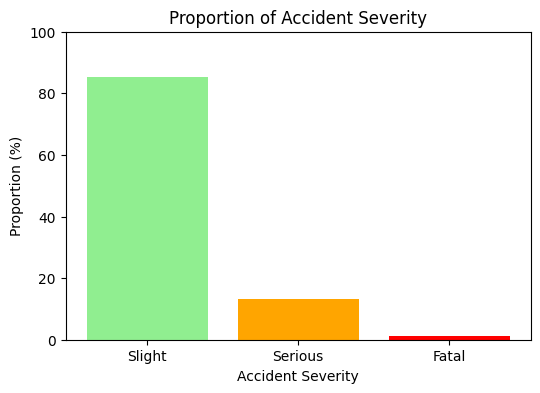

In [37]:
severity = ["Slight", "Serious", "Fatal"]
proportion = [85.34, 13.35, 1.31]  # Percentage values

plt.figure(figsize=(6, 4))
plt.bar(severity, proportion, color=["lightgreen", "orange", "red"])

plt.xlabel("Accident Severity")
plt.ylabel("Proportion (%)")
plt.title("Proportion of Accident Severity")
plt.ylim(0, 100)
plt.show()

<h1>13. Correlation Between Weather and Severe Accidents</h1>

In [38]:
weather_severity = accident.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack().reset_index()
weather_severity

C:\Users\User\AppData\Local\Temp\ipykernel_7912\1157313390.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_severity = accident.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack().reset_index()


Accident_Severity,Weather_Conditions,Fatal,Serious,Slight
0,Fine + high winds,175,1245,7134
1,Fine no high winds,7100,72046,441739
2,Fog or mist,82,483,2963
3,Other,165,1801,15184
4,Raining + high winds,145,1261,8209
5,Raining no high winds,848,9468,69380
6,Snowing + high winds,3,109,773
7,Snowing no high winds,36,565,5637


<h2>Insight 13 - Accidents are most frequent in clear weather with no high winds, but severe accidents still occur in fog, mist, and rainy conditions, indicating that poor visibility and wet roads increase accident severity.</h2>

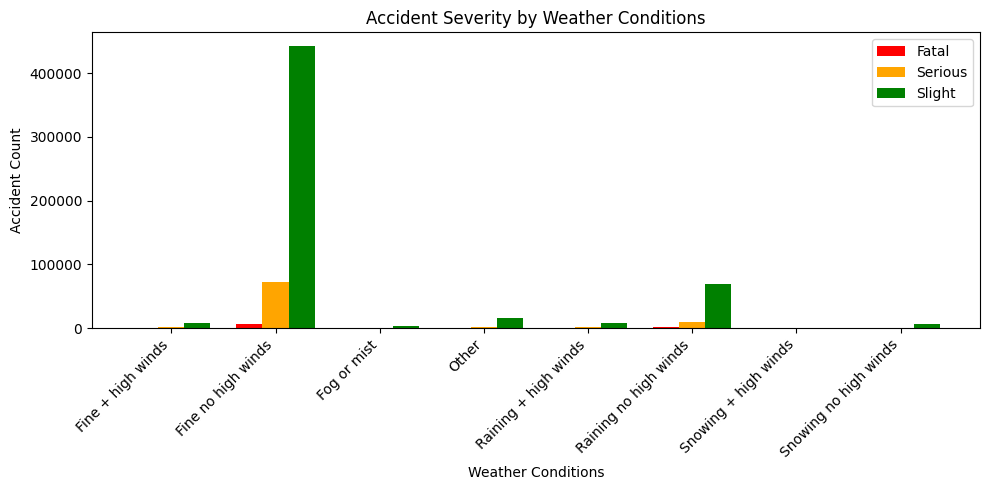

In [39]:
weather_conditions = [
    "Fine + high winds", "Fine no high winds", "Fog or mist", "Other",
    "Raining + high winds", "Raining no high winds", "Snowing + high winds", "Snowing no high winds"
]
fatal = [175, 7100, 82, 165, 145, 848, 3, 36]
serious = [1245, 72046, 483, 1801, 1261, 9468, 109, 565]
slight = [7134, 441739, 2963, 15184, 8209, 69380, 773, 5637]

x = np.arange(len(weather_conditions))  # x locations for bars
width = 0.25  # Bar width

plt.figure(figsize=(10, 5))
plt.bar(x - width, fatal, width, label="Fatal", color="red")
plt.bar(x, serious, width, label="Serious", color="orange")
plt.bar(x + width, slight, width, label="Slight", color="green")

plt.xlabel("Weather Conditions")
plt.ylabel("Accident Count")
plt.title("Accident Severity by Weather Conditions")
plt.xticks(ticks=x, labels=weather_conditions, rotation=45, ha="right")
plt.legend()

plt.tight_layout()
plt.show()

In [40]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660654 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660653 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  659953 non-null  object        
 10  Road_Type                656159 non-null  object        
 11  Urban_or_Rural_Area      660664 non-null  object        
 12  Weather_Conditio

<h1>14. Is there a correlation between the number of vehicles and casualties</h1>

In [41]:
casualties_by_vehicle_count = accident.groupby('Number_of_Vehicles')['Number_of_Casualties'].sum().reset_index()
casualties_by_vehicle_count

,Number_of_Vehicles,Number_of_Casualties
0,1,235108
1,2,538946
2,3,90360
3,4,22550
4,5,5705
5,6,1980
6,7,907
7,8,500
8,9,191
9,10,98


<h2>Casualties increase with the number of vehicles but at a decreasing rate. Most accidents involve 1-2 vehicles, causing the highest casualties. Beyond three vehicles, the rise in casualties is less significant, indicating that severe accidents are more common in smaller collisions.</h2>

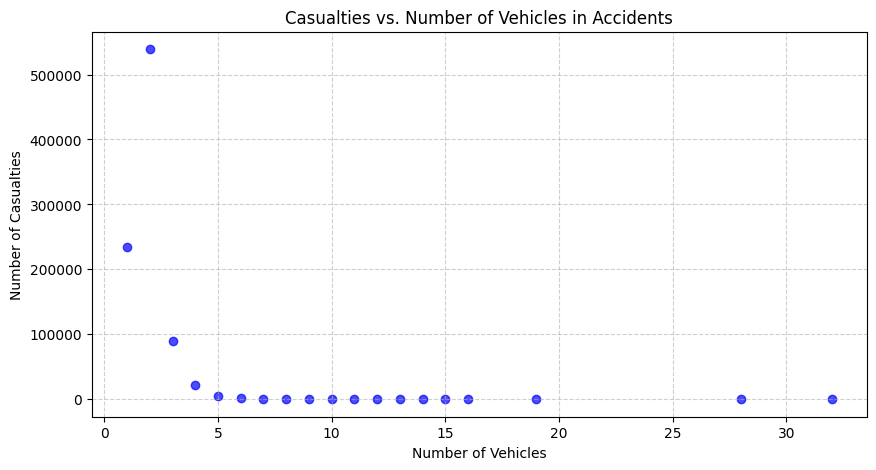

In [42]:
num_vehicles = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 28, 32]
num_casualties = [235108, 538946, 90360, 22550, 5705, 1980, 907, 500, 191, 98, 48, 16, 47, 49, 5, 24, 13, 16, 5]

plt.figure(figsize=(10, 5))
plt.scatter(num_vehicles, num_casualties, color='blue', marker='o', alpha=0.7)

plt.xlabel("Number of Vehicles")
plt.ylabel("Number of Casualties")
plt.title("Casualties vs. Number of Vehicles in Accidents")
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

<h1>15. Trends in Casualties by Accident Severity</h1>

In [43]:
casualty_trends_severity = accident.groupby(['Accident Date', 'Accident_Severity'])['Number_of_Casualties'].sum().unstack().fillna(0)
casualty_trends_severity


C:\Users\User\AppData\Local\Temp\ipykernel_7912\4008452767.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  casualty_trends_severity = accident.groupby(['Accident Date', 'Accident_Severity'])['Number_of_Casualties'].sum().unstack().fillna(0)


Accident_Severity,Fatal,Serious,Slight
Accident Date,,,
2019-01-01,19,74,401
2019-01-02,7,79,419
2019-01-03,79,85,441
2019-01-04,8,77,468
2019-01-05,10,93,484
...,...,...,...
2022-12-27,8,34,224
2022-12-28,12,39,223
2022-12-29,2,46,255


<h2>Fatal, serious, and slight casualties fluctuate daily, with some spikes. Monitoring trends over time can help identify high-risk periods and improve road safety measures</h2>

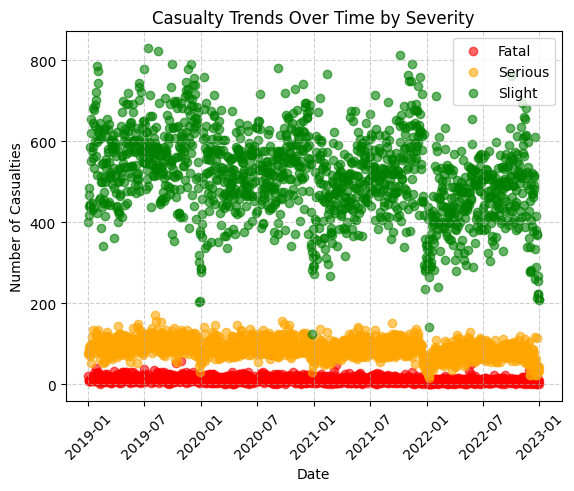

In [44]:
plt.scatter(casualty_trends_severity.index, casualty_trends_severity['Fatal'], color='red', label='Fatal', alpha=0.6)
plt.scatter(casualty_trends_severity.index, casualty_trends_severity['Serious'], color='orange', label='Serious', alpha=0.6)
plt.scatter(casualty_trends_severity.index, casualty_trends_severity['Slight'], color='green', label='Slight', alpha=0.6)

plt.xlabel("Date")
plt.ylabel("Number of Casualties")
plt.title("Casualty Trends Over Time by Severity")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

<h1>16.  Correlation Between Severity Levels</h1>

In [45]:
correlation_matrix = casualty_trends_severity.corr()
correlation_matrix


Accident_Severity,Fatal,Serious,Slight
Accident_Severity,,,
Fatal,1.000000,0.302585,0.155917
Serious,0.302585,1.000000,0.511648
Slight,0.155917,0.511648,1.000000


<h2>inisght 16 - Serious and slight casualties are moderately correlated (0.51), while fatal casualties have weak links with both, suggesting most accidents result in non-fatal injuries.</h2>

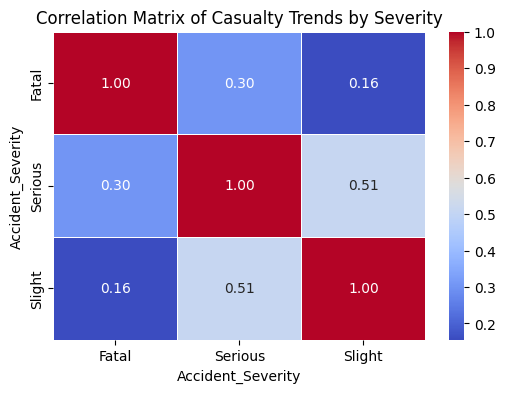

In [46]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of Casualty Trends by Severity")

# Show plot
plt.show()

<h1>17.Average Casualties per Day of the Week</h1>

In [47]:

casualty_trends_severity.index = pd.to_datetime(casualty_trends_severity.index)
casualty_trends_severity['Day_of_Week'] = casualty_trends_severity.index.day_name()
average_per_day = casualty_trends_severity.groupby('Day_of_Week').mean()
average_per_day


Accident_Severity,Fatal,Serious,Slight
Day_of_Week,,,
Friday,9.607656,85.980861,524.244019
Monday,13.269231,89.644231,409.230769
Saturday,11.880383,97.894737,583.023923
Sunday,14.793269,97.225962,499.043269
Thursday,9.842105,83.325359,535.875598
Tuesday,9.822967,82.081340,510.588517
Wednesday,9.784689,84.066986,533.947368


<h2>Sundays have the highest fatal casualties, while serious injuries are more common on Saturdays. Slight injuries peak midweek, particularly on Wednesdays and Thursdays.</h2>

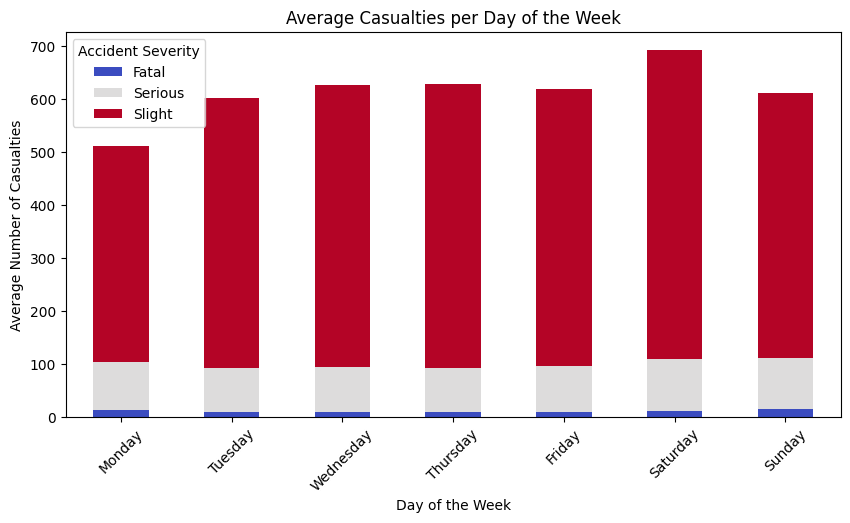

In [48]:
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
average_per_day = average_per_day.reindex(days_order)

average_per_day.plot(kind="bar", figsize=(10, 5), stacked=True, colormap="coolwarm")

plt.title("Average Casualties per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Number of Casualties")
plt.xticks(rotation=45)
plt.legend(title="Accident Severity")

plt.show()

<h1>18.</h1>

In [49]:
vehicle_percentage = accident['Vehicle_Type'].value_counts(normalize=True) * 100
vehicle_percentage


Vehicle_Type
Car                                      75.375788
Van / Goods 3.5 tonnes mgw or under       5.170438
Bus or coach (17 or more pass seats)      3.916879
Motorcycle over 500cc                     3.883429
Goods 7.5 tonnes mgw and over             2.619578
Motorcycle 125cc and under                2.311107
Taxi/Private hire car                     2.012172
Motorcycle over 125cc and up to 500cc     1.158808
Motorcycle 50cc and under                 1.150786
Goods over 3.5t. and under 7.5t           0.922687
Other vehicle                             0.853213
Minibus (8 - 16 passenger seats)          0.299086
Agricultural vehicle                      0.294697
Pedal cycle                               0.029818
Data missing or out of range              0.000908
Ridden horse                              0.000605
Name: proportion, dtype: float64

<h2>Cars account for the majority of accidents (75.38%), while vans, buses, and motorcycles contribute smaller but notable shares, highlighting their involvement in road incidents.</h2>

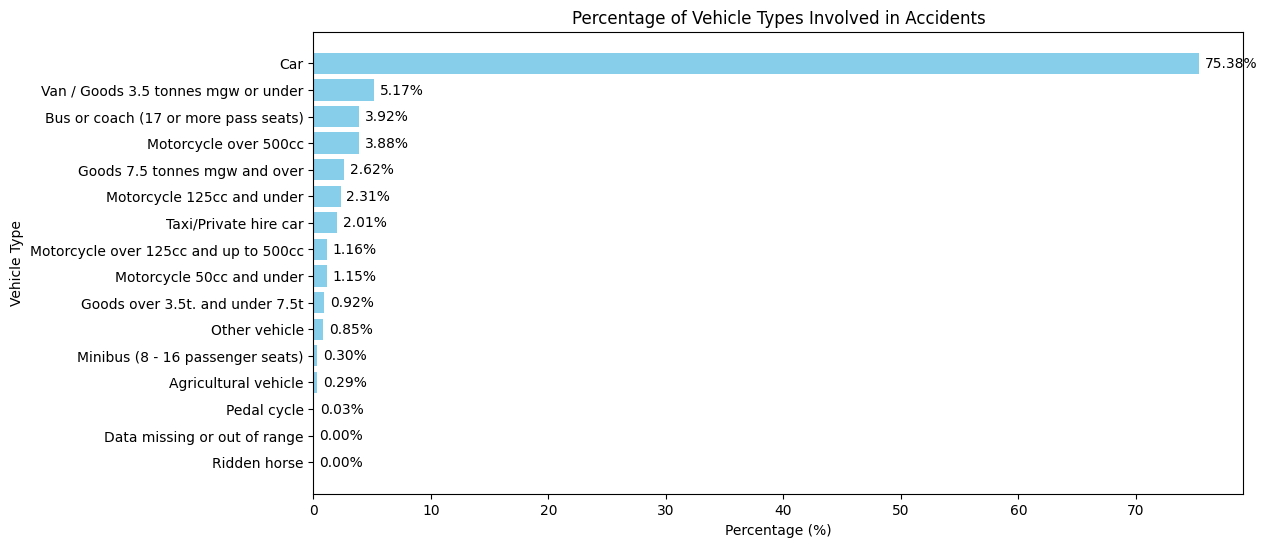

In [50]:
vehicle_percentage = vehicle_percentage.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(vehicle_percentage.index, vehicle_percentage.values, color="skyblue")

plt.title("Percentage of Vehicle Types Involved in Accidents")
plt.xlabel("Percentage (%)")
plt.ylabel("Vehicle Type")

for index, value in enumerate(vehicle_percentage.values):
    plt.text(value + 0.5, index, f"{value:.2f}%", va="center")

plt.gca().invert_yaxis()  # Invert y-axis to have the highest percentage on top
plt.show()

<h1>19. average number of casualties on different road surface conditions</h1>

In [51]:
avg_casa_surface = accident.groupby('Road_Surface_Conditions')['Number_of_Casualties'].mean()
avg_casa_surface

Road_Surface_Conditions
Dry                     1.334736
Flood over 3cm. deep    1.495575
Frost or ice            1.348815
Snow                    1.359593
Wet or damp             1.411064
Name: Number_of_Casualties, dtype: float64

<h2>Insight 19 - Flooded roads have the highest casualties, followed by wet and snowy conditions, while dry roads have the lowest. Slippery surfaces increase accident severity, highlighting the need for cautious driving in bad weather.</h2>

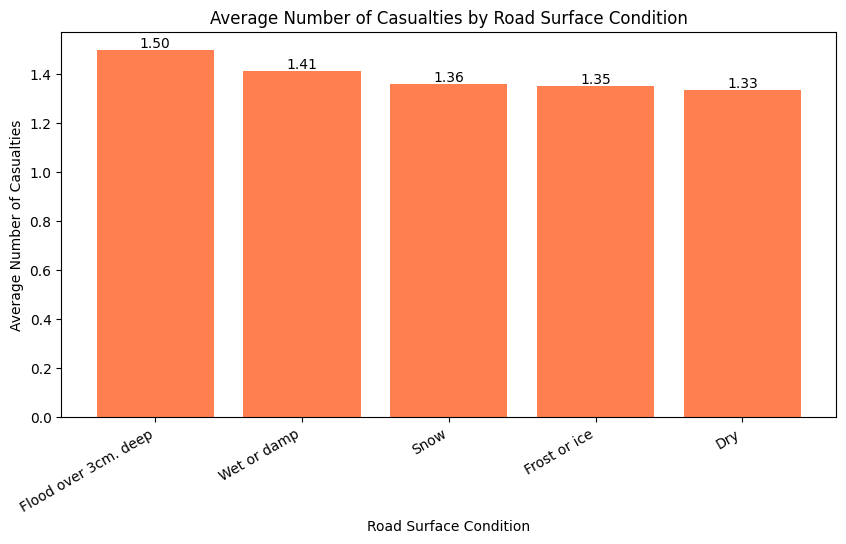

In [52]:
avg_casa_surface = avg_casa_surface.sort_values(ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(avg_casa_surface.index, avg_casa_surface.values, color="coral")

plt.title("Average Number of Casualties by Road Surface Condition")
plt.xlabel("Road Surface Condition")
plt.ylabel("Average Number of Casualties")

plt.xticks(rotation=30, ha="right")

for index, value in enumerate(avg_casa_surface.values):
    plt.text(index, value + 0.01, f"{value:.2f}", ha="center")

plt.show()

<h1>20. How many accidents occurred based on severity, lighting conditions, and road type </h1>

In [53]:
accident_light_road = accident.groupby(['Accident_Severity', 'Light_Conditions', 'Road_Type']).size()
accident_light_road

C:\Users\User\AppData\Local\Temp\ipykernel_7912\2707627551.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_light_road = accident.groupby(['Accident_Severity', 'Light_Conditions', 'Road_Type']).size()


Accident_Severity  Light_Conditions             Road_Type         
Fatal              Darkness - lighting unknown  Dual carriageway           7
                                                One way street             1
                                                Roundabout                 0
                                                Single carriageway        56
                                                Slip road                  1
                                                                       ...  
Slight             Daylight                     Dual carriageway       61799
                                                One way street          8726
                                                Roundabout             29895
                                                Single carriageway    310730
                                                Slip road               4797
Length: 75, dtype: int64

<h2>Insight 20 - Most accidents happen on single carriageways in daylight, likely due to high traffic. However, fatal accidents are more common in darkness, especially on single carriageways, suggesting poor visibility increases severity. Better lighting and awareness can help reduce risks.</h2>

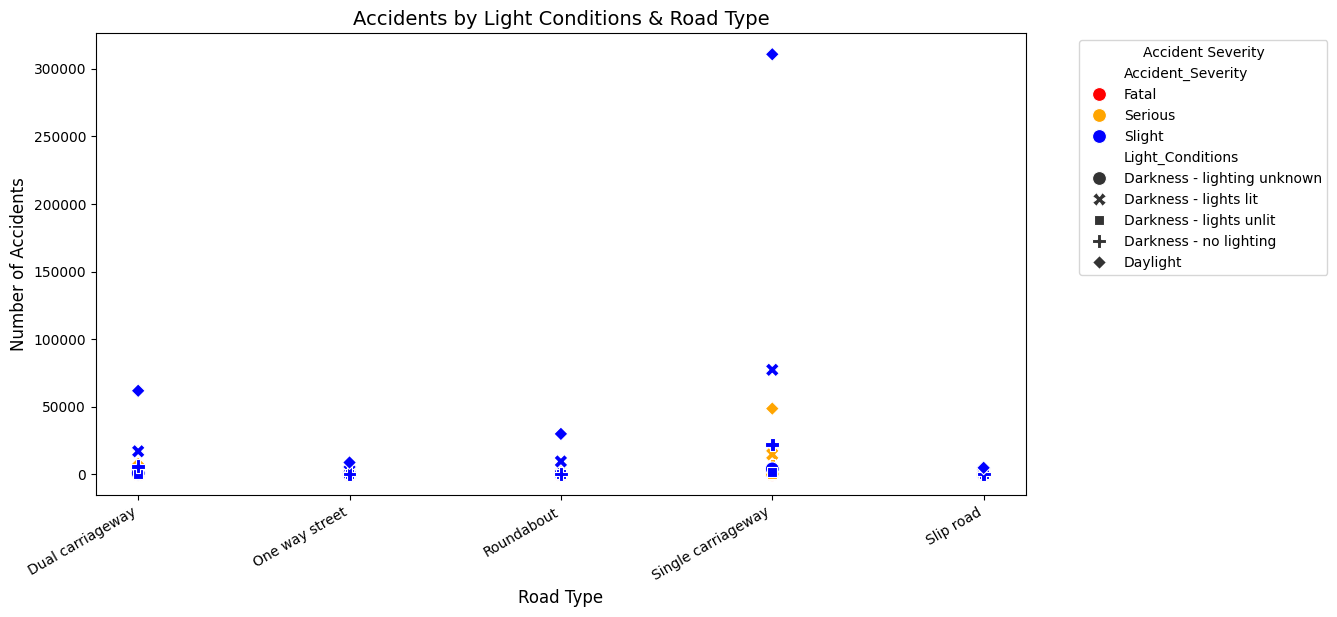

In [54]:
accident_light_road_df = accident_light_road.reset_index(name='Accident_Count')
severity_palette = {'Fatal': 'red', 'Serious': 'orange', 'Slight': 'blue'}

plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=accident_light_road_df, 
    x='Road_Type', 
    y='Accident_Count', 
    hue='Accident_Severity', 
    style='Light_Conditions', 
    palette=severity_palette, 
    s=100
)

plt.title("Accidents by Light Conditions & Road Type", fontsize=14)
plt.xlabel("Road Type", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks(rotation=30, ha="right")
plt.legend(title="Accident Severity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()